<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear regression</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic regression</a></span></li></ul></div>

# Linear regression

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures

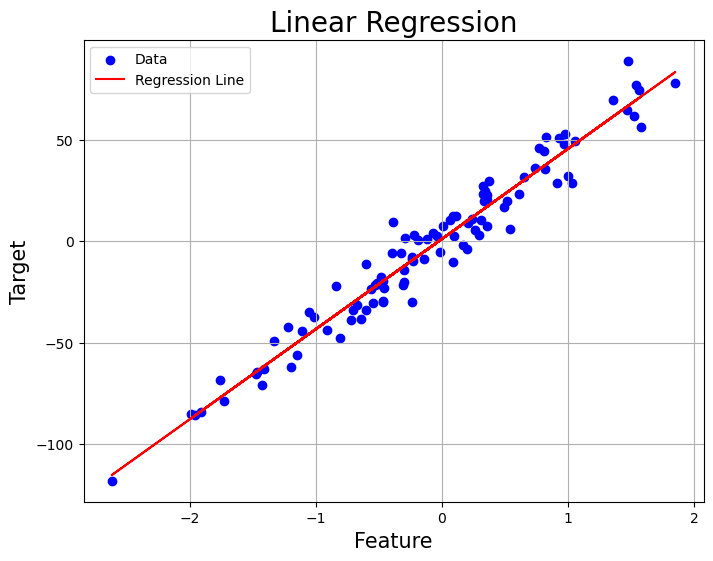

In [28]:
# ランダムな線形データの生成
X, y, coef = make_regression(n_samples=100, n_features=1, noise=10, coef=True, random_state=42)

# 線形単回帰モデルの作成とトレーニング
model = LinearRegression()
model.fit(X, y)

# モデルによる予測
y_pred = model.predict(X)

# 図のプロット
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression', fontsize=20)
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.legend()
plt.grid(True)
plt.savefig('../figures/linear.png')

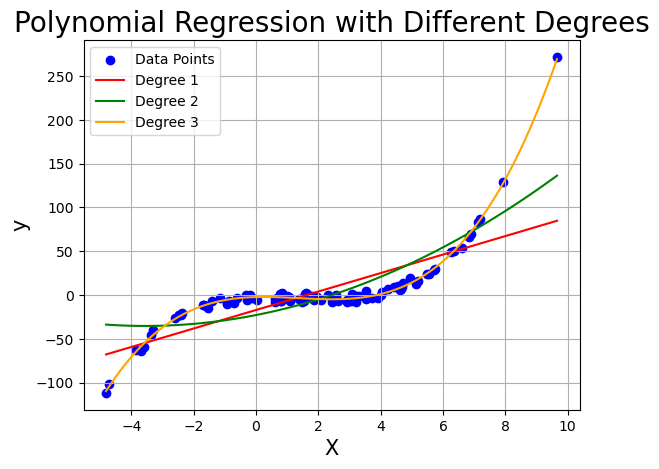

In [33]:
# 適当なデータを生成
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 100)
X = X[:, np.newaxis]

# プロットの準備
plt.scatter(X, y, color='blue', label='Data Points')

# 項数を変えて多項式回帰を適用
degrees = [1, 2, 3]
colors = ['red', 'green', 'orange']
labels = ['Degree 1', 'Degree 2', 'Degree 3']

# プロットのためのX値
X_plot = np.linspace(X.min(), X.max(), 100)
X_plot = X_plot[:, np.newaxis]

for i, degree in enumerate(degrees):
    # 多項式特徴量を生成
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)

    # 線形回帰モデルをフィット
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # 回帰曲線をプロット
    y_poly_plot = model.predict(polynomial_features.fit_transform(X_plot))
    plt.plot(X_plot, y_poly_plot, color=colors[i], label=labels[i])

# グラフの設定
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend()
plt.grid()
plt.title('Polynomial Regression with Different Degrees', fontsize=20)
plt.savefig('../figures/polynomial.png')

# Logistic regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

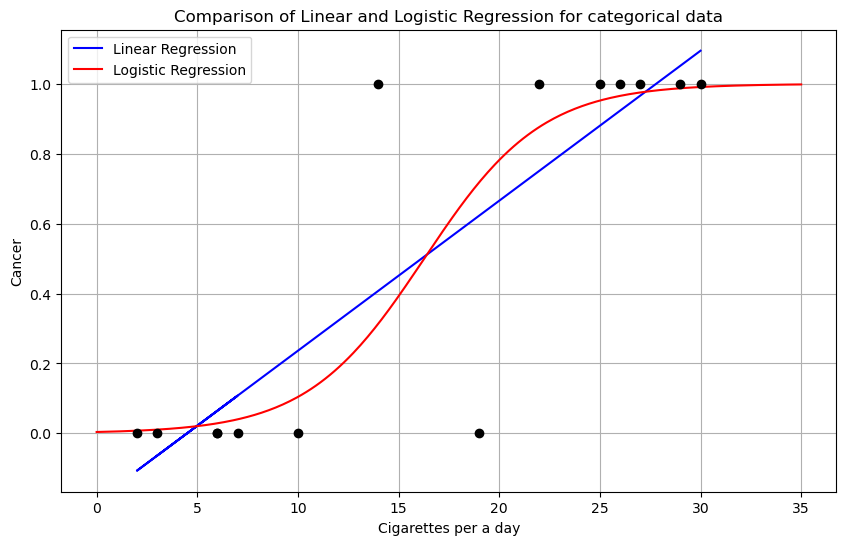

In [7]:
# データの定義
x = np.array([3, 7, 2, 6, 6, 10, 14, 19, 22, 25,26,27,29, 30]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,1,1,1])

# 線形単回帰モデル
lin_reg = LinearRegression()
lin_reg.fit(x, y)
y_pred_lin = lin_reg.predict(x)

# ロジスティック回帰モデル
log_reg = LogisticRegression()
log_reg.fit(x, y)
x_test = np.linspace(0, 35, 300).reshape(-1, 1)
y_pred_log = log_reg.predict_proba(x_test)[:, 1]

# プロット
plt.figure(figsize=(10, 6))

# 元データのプロット
plt.scatter(x, y, color='black', zorder=5)

# 線形回帰のプロット
plt.plot(x, y_pred_lin, label='Linear Regression', color='blue')

# ロジスティック回帰のプロット
plt.plot(x_test, y_pred_log, label='Logistic Regression', color='red')

# 設定
plt.xlabel('Cigarettes per a day')
plt.ylabel('Cancer')
plt.title('Comparison of Linear and Logistic Regression for categorical data')
plt.legend()
plt.grid(True)

plt.savefig('../figures/logistic1.png')

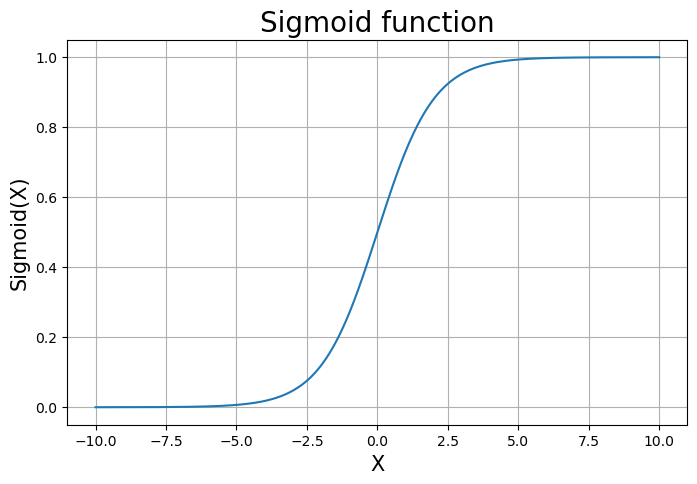

In [14]:
# シグモイド関数をプロット
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(-10, 10, 400)
y_values = sigmoid(x_values)

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label='Sigmoid Function')
plt.title('Sigmoid function', fontsize=20)
plt.xlabel('X', fontsize=15)
plt.ylabel('Sigmoid(X)', fontsize=15)
plt.grid(True)
plt.savefig('../figures/sigmoid.png')

C:\Users\goto\AppData\Local\Temp\ipykernel_8816\2269037043.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter', marker='x',edgecolors='k', alpha=0.8, label='Training data')


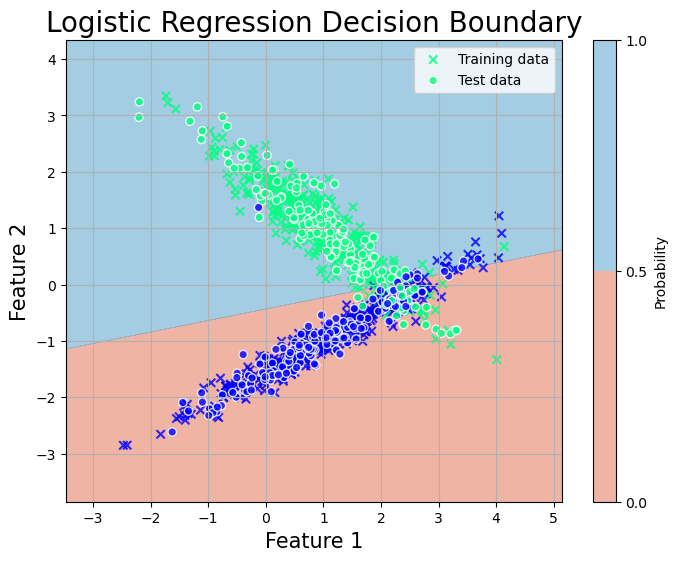

In [24]:
# ランダムな2値分類データセットの生成
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ロジスティック回帰モデルの作成とトレーニング
model = LogisticRegression()
model.fit(X_train, y_train)

# モデルの回帰線と決定境界をプロットするための設定
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# モデルによる決定境界
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# 図のプロット
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='RdBu', alpha=0.6)
plt.colorbar(label='Probability')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter', marker='x',edgecolors='k', alpha=0.8, label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='winter', edgecolors='white', alpha=0.8, label='Test data')
plt.title('Logistic Regression Decision Boundary', fontsize=20)
plt.xlabel('Feature 1', fontsize=15)
plt.ylabel('Feature 2', fontsize=15)
plt.legend()
plt.grid(True)
plt.savefig('../figures/logistic2.png')

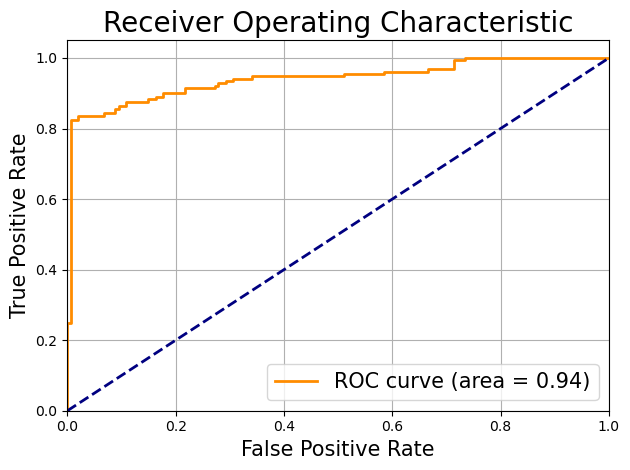

In [18]:
# テストデータに対する予測確率
y_scores = model.predict_proba(X_test)[:, 1]

# ROC曲線とAUCの計算
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver Operating Characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=15)
plt.grid(True)

plt.tight_layout()
plt.savefig('../figures/ROC.png')